In this notebook we go through the process of reading trajectories and displaying their XY projection, as an example of how to manipulate trajectory objects. Naturally, trajectories contain 3D data, but here we only use a 2D view for simplicity.

The first step is to import the necessary modules. We use Matplotlib's pyplot for simple plotting commands, and ``flowtracks.io`` is the module supplied by the PostPTV project for reading trajectories in various formats. In it, ``trajectories_ptvis()`` handles two similar formats: ``ptv_is`` is the standard  output of OpenPTV; it is a series of files with a name like ``ptv_is.10001`` where the number denotes the frame number. Each line in the file describes one particle. ``xuap`` is a similar format for trajectories, with different indexing and additional data stored for each particle.

In [5]:
from matplotlib import pyplot
from flowtracks.io import trajectories_ptvis

In the next step we point the reading function to the location of our files using a format string. The %d marks for the reading code the position of the frame number in the file names.  The use of the ``xuap`` format here must be explicitly stated. 

Note that we request only trajectories at least 5 frames long to be read. For large data sets, this saves a lot of memory in the reading process.

In [6]:
inName = '/Users/alex/Downloads/Exp20180122_Alex/res/ptv_is.%d'
trajects = trajectories_ptvis(inName, traj_min_len=3)

Finally, we create a figure and plot the trajectories. For each trajectory, the ``.pos()`` method returns a $(t,3)$-shaped array for $t$ frames where the trajectory is present. Other methods available include ``velocity()`` and ``accel()``.

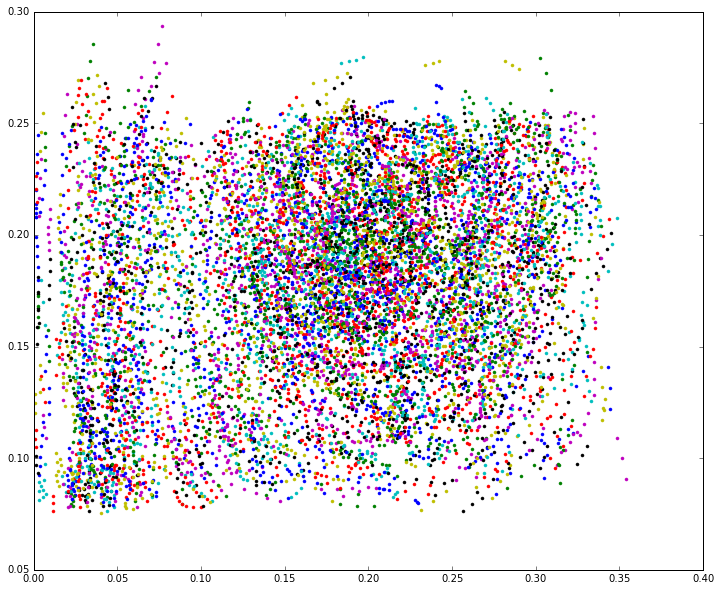

In [7]:
pyplot.figure(figsize = (12, 10))

for traj in trajects:
	pyplot.plot(traj.pos()[:,0], traj.pos()[:,1], '.')

pyplot.show()

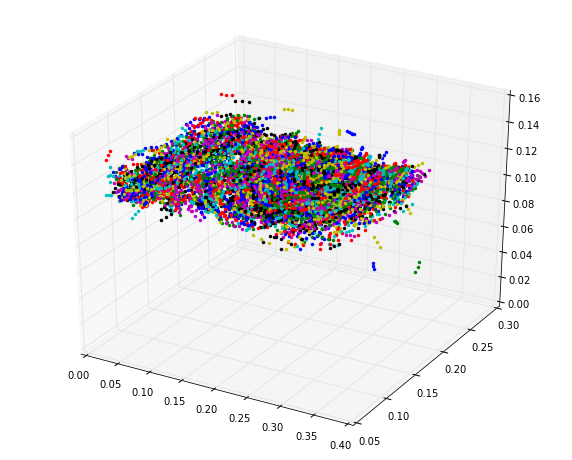

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for traj in trajects:
	ax.plot(traj.pos()[:,0], traj.pos()[:,1], traj.pos()[:,2], '.')

plt.show()